<a href="https://colab.research.google.com/github/abharr/Abby-Neur-265/blob/main/coding_homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding Homework #4

**Instructions**

1. Make a *Markdown Cell* that contains the following information:
- Your name (small header)
- The name of this class (italicized)
- The date (bolded)

2. Create a *Code Cell* that imports relevant modules - specifically, <code>pandas as pd</code>, <code>matplotlib.pyplot as plt</code>, and <code>scipy.stats as stats</code>.

3. For this assignment, you'll be using the <code>patch_seq_expanded.csv</code> file located in our class GitHub repo. Create a *Code Cell* that loads this file in as a <code>Pandas dataFrame</code> called <code>patch_seq</code>. 

4. In a new *Code Cell*, using the <code>df.plot</code> method from the <code>pandas</code> module, make a bar graph that displays the value counts (how many observations) from the "Marker" column of your <code>patch_seq</code> variable. Label your x and y-axes.

5. In a new *Code Cell*, repeat step 4, but make a pie chart instead of a bar graph.

6. In a new *Code Cell*, use a <code>for</code> loop to make a scatter plot of the "ISI" (on the x-axis) and "Fast_Trough" (on the y-axis) values in your <code>patch_seq</code> dataframe. Your loop should make data points from "Sst" neurons <font color = 'red'>red</font>, and data points from "Pvalb" neurons <font color = 'blue'>blue</font>.

7. In a new *Code Cell*, create a <code>function</code> called <code>patchScatter()</code> that will output the scatter plot created in step 6 when you call it. Don't forget to tell it to show your scatter plot!

8. In a new *Code Cell*, return the mean, standard deviation, and range of the "Fast_Trough" column for "Sst" neurons and "Pvalb" neurons. You can do this with the <code>pandas</code> method <code>describe</code>, like so:

<code>patch_seq.groupby('Marker')['Fast_Trough'].describe()</code>

9. In a new *Markdown Cell*, describe the difference in means between "Sst" neurons and "Pvalb" neurons. Which group has a more negative undershoot following an action potential? 

10. In a new *Code Cell*, return the skewness of the "Fast_Trough" column for "Sst" neurons and "Pvalb" neurons. You can do this with the <code>pandas</code> method <code>skew</code> (follow the syntax in step 8 to apply this method to <code>patch_seq</code>).

11. In a new *Markdown Cell*, interpret the results of your skewness test. Generally, values >0.5, or <-0.5, indicate a skewed distribution, while values between -0.5 and 0.5 indicate a normal distribution.

12. In a new *Code Cell*, repeat step 10 for the "ISI" column of <code>patch_seq</code>. 

13. In a new *Markdown Cell*, repeat step 11 for the "ISI" column of <code>patch_seq</code>. 

14. Finally, in a new *Code Cell*, let's perform a t-test to see if our "Fast_Trough" and "ISI" values differ between "Sst" and "Pvalb" neurons. To do this for our "Fast_Trough" values, we should first isolate each group and make each of them into a separate variable. An example of how to do this for "Sst" neurons is below:

<code>sst_neurons = patch_seq[patch_seq['Marker']=='Sst']</code>

Use the same code to create another variable called <code>pvalb_neurons</code>. Once you've made your two variables, perform an independent-samples t-test to compare "Fast_Trough" values between the two groups:

<code>stats.ttest_ind(sst_neurons['Fast_Trough'], pvalb_neurons['Fast_Trough'])</code>.

15. In a *Markdown Cell*, describe the results of your t-test. Does the undershoot voltage significantly differ betwen the two groups?

16. In a new *Code Cell*, repeat step 14 for "ISI". You won't need to create new <code>sst_neurons</code> and <code>pvalb_neurons</code> variables - you'll just need to run a new t-test. 

17. In a new *Markdown Cell*, repeat step 15 for the results of your new t-test.

18. Make sure to put a <code>#</code> in each *Code Cell* to describe what it does.

19. Save a copy of this notebook to your GitHub repo with the title <code>coding_homework_4.ipynb</code>.




##Abby Harr
*Neur 265*

**3/24/2023**


In [2]:
#import needed packages
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [3]:
#import patch_seq_expanded.csv as pandas dataframe
patch_seq = pd.read_csv('https://raw.githubusercontent.com/hallockh/neur_265/main/patch_seq_expanded.csv')
print(type(patch_seq))
print(patch_seq)

<class 'pandas.core.frame.DataFrame'>
           ISI  Fast_Trough Marker
0    77.337143   -49.899998    Sst
1    17.177895   -44.462498    Sst
2    48.294737   -47.350002    Sst
3     8.980000   -45.656254    Sst
4    30.315385   -50.737499    Sst
..         ...          ...    ...
360  11.052333   -54.743752  Pvalb
361   8.860360   -64.875008  Pvalb
362   9.192897   -51.312504  Pvalb
363  10.544731   -52.281254  Pvalb
364  16.396364   -61.437504  Pvalb

[365 rows x 3 columns]


In [4]:
#get rid of empty values
patch_seq['ISI'] = patch_seq['ISI'].fillna(0)

Text(0, 0.5, 'Count')

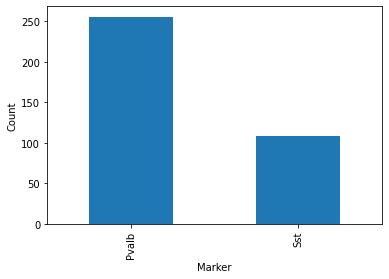

In [5]:
#plot bar graph of marker column
ax = patch_seq['Marker'].value_counts().plot(kind='bar')
ax.set_xlabel("Marker")
ax.set_ylabel("Count")


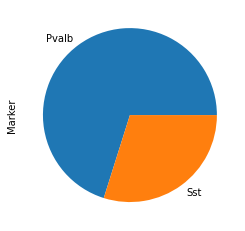

In [6]:
#repeat with pie chart
ax = patch_seq['Marker'].value_counts().plot(kind='pie')

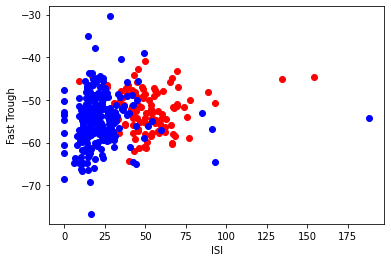

In [7]:
#create scatter plot of ISI vs Fast trough values for Sst and Pvalb neurons
for i in range(len(patch_seq)):
  if patch_seq.iloc[i,2] == 'Sst':
    plt.scatter(patch_seq.iloc[i,0],patch_seq.iloc[i,1],color='red')
  else:
    plt.scatter(patch_seq.iloc[i,0],patch_seq.iloc[i,1],color='blue')
  plt.xlabel('ISI')
  plt.ylabel('Fast Trough')

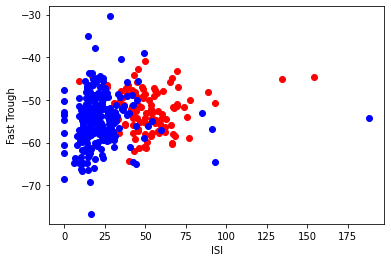

In [14]:
#define funtion patchScatter() to create scatterplot of patch_seq
def patchScatter():
  for i in range(len(patch_seq)):
    if patch_seq.iloc[i,2] == 'Sst':
      plt.scatter(patch_seq.iloc[i,0],patch_seq.iloc[i,1],color='red')
    else:
     plt.scatter(patch_seq.iloc[i,0],patch_seq.iloc[i,1],color='blue')
    plt.xlabel('ISI')
    plt.ylabel('Fast Trough')
patchScatter()

In [9]:
#get fast trough stats for Sst and Pvalb neurons
patch_seq.groupby('Marker')['Fast_Trough'].describe()

,count,mean,std,min,25%,50%,75%,max
Marker,,,,,,,,
Pvalb,256.0,-54.548074,5.870670,-76.687508,-57.914063,-54.490629,-51.364065,-30.406252
Sst,109.0,-52.514968,4.958103,-64.375008,-55.931252,-52.568752,-48.500000,-40.781254


Pvalb neurons have a more negative undershoot (mean = -54.55) as compared to Sst neurons (mean = -52.51).

In [10]:
#compare skewness of Fast-trough data
patch_seq.groupby('Marker')['Fast_Trough'].skew()

Marker
Pvalb    0.19536
Sst      0.00125
Name: Fast_Trough, dtype: float64

Neither of the fast trough datasets appears to be skewed: both have a skew value between -0.5 and 0.5.

In [11]:
#get skew values for ISI data
patch_seq.groupby('Marker')['ISI'].skew()

Marker
Pvalb    5.200362
Sst      1.857850
Name: ISI, dtype: float64

The ISI data does appear to be skewed for both types of neurons (both skew values are greater than 0.5).

In [15]:
#create separate variables for Sst and Pvalb neurons
sst_neurons = patch_seq[patch_seq['Marker']=='Sst']
pvalb_neurons = patch_seq[patch_seq['Marker']=='Pvalb']
#perform t-test comparing Fast Trough values between Sst and Pvalb neurons
stats.ttest_ind(sst_neurons['Fast_Trough'], pvalb_neurons['Fast_Trough'])

Ttest_indResult(statistic=3.1660773376899147, pvalue=0.0016757984214133585)

The p-value from the Ttest is less than 0.05, so the undershoot voltage does differ significantly between Pvalb and Sst neurons. Looking at the earlier descriptive statistics, Pvalb neurons have a slightly lower undershoot voltage on average.

In [16]:
#perform t-test comparing ISI values for Sst and Pvalb neurons
stats.ttest_ind(sst_neurons['ISI'], pvalb_neurons['ISI'])

Ttest_indResult(statistic=15.004913280678535, pvalue=6.160372584319923e-40)

The ISI values for Sst vs Pvalb are significantly different: the p-value is much smaller than 0.05. Looking back at the scatter plot, it appears that Pvalb neurons have a lower ISI on average than Sst neurons.